# **WALK RUN CLASSIFICATION**

## _1) Importing libraries_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## _2) Loading Data_

In [2]:
data=pd.read_csv("walkrun.csv") #loading the dataset

## _3) Basic EDA checks_

In [3]:
data.head() #checking the first 5 cells of the data set

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:
data.tail() #checking the last 5 cells of the dataset

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [5]:
data.sample(5) #checking 5 random cells in the dataset

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
54475,2017-7-17,20:8:56:885267972,viktor,1,1,-0.4013,0.7693,-0.0812,-1.1346,0.3264,-0.6397
381,2017-6-30,13:53:32:479349017,viktor,0,0,0.2971,-0.6829,-0.1402,0.8385,-0.6104,1.9295
64294,2017-7-4,19:33:7:330386996,viktor,0,1,0.7608,-0.7877,-0.9090,-0.0823,-0.3610,-2.1947
88014,2017-7-9,20:7:9:317487001,viktor,0,0,0.5275,-0.8230,-0.5317,0.4453,1.4041,0.8317
84068,2017-7-9,19:52:11:500769019,viktor,0,1,0.9526,-1.2594,-0.9635,-0.2353,0.0233,2.9140


In [6]:
data.info()  #checking the basic information like count and datatype of the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [7]:
data.describe() #getting the statistical report of the numeric columns in the dataset

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


#### *Insights from the describe function:*

- **Count** - All the features have the same number of values
- **wrist and activity** -  wrist and activity are the nominal features because it is categorical and have no order
- **mean** - Mean value gives the most helpful information on the skewness of the sample data
- **wrist mean** - Mean value of the Wrist is around 0.5 so the data is not heavily skewed
- **activity mean** - Mean value of the activity is around 0.5 so the data is not heavily skewed

In [8]:
data.describe(include=["O"]) #checking the unique values of the Object data in the dataset

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


#### *Insights from Categorical data:*

- The dataset records 88,588 events from a single user ("viktor")
- There are only 12 unique dates, meaning the data covers 12 days

In [9]:
data.isnull().sum() #to check the null values in a data

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [10]:
data.shape #checking the number of rows and columns in a dataset

(88588, 11)

In [11]:
data.keys() #checking the column names in the dataset

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [12]:
col=data.keys()
print(col)

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')


In [13]:
print(f"The dimension of the data is: {data.ndim} dimensional") #Checking the dimension of the data frame and it is a 2 dimension data

The dimension of the data is: 2 dimensional


In [14]:
col1=data.iloc[:,3:5].reset_index(drop=True) #Extracting the categorical columns

In [15]:
for i in col1:                             #checking the count of the categorical columns
    print(f"columns: {i}")
    print(data[i].value_counts())
    print(f"Total unique values: {data[i].nunique()}") 
    print("-"*30)

columns: wrist
wrist
1    46258
0    42330
Name: count, dtype: int64
Total unique values: 2
------------------------------
columns: activity
activity
1    44365
0    44223
Name: count, dtype: int64
Total unique values: 2
------------------------------


In [16]:
#Seperating the numerical columns alone from the data

numerical_columns=["wrist", "acceleration_x",	"acceleration_y", "acceleration_z",	"gyro_x", "gyro_y",	"gyro_z"]  

In [17]:
numerical_data=data[numerical_columns]  #storing the numerical data in a index
numerical_data.head()

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [18]:
numerical_feature=["acceleration_x",	"acceleration_y", "acceleration_z",	"gyro_x", "gyro_y",	"gyro_z"]
numerical_feature_data=data[numerical_feature]

## *4) Data Visualization*

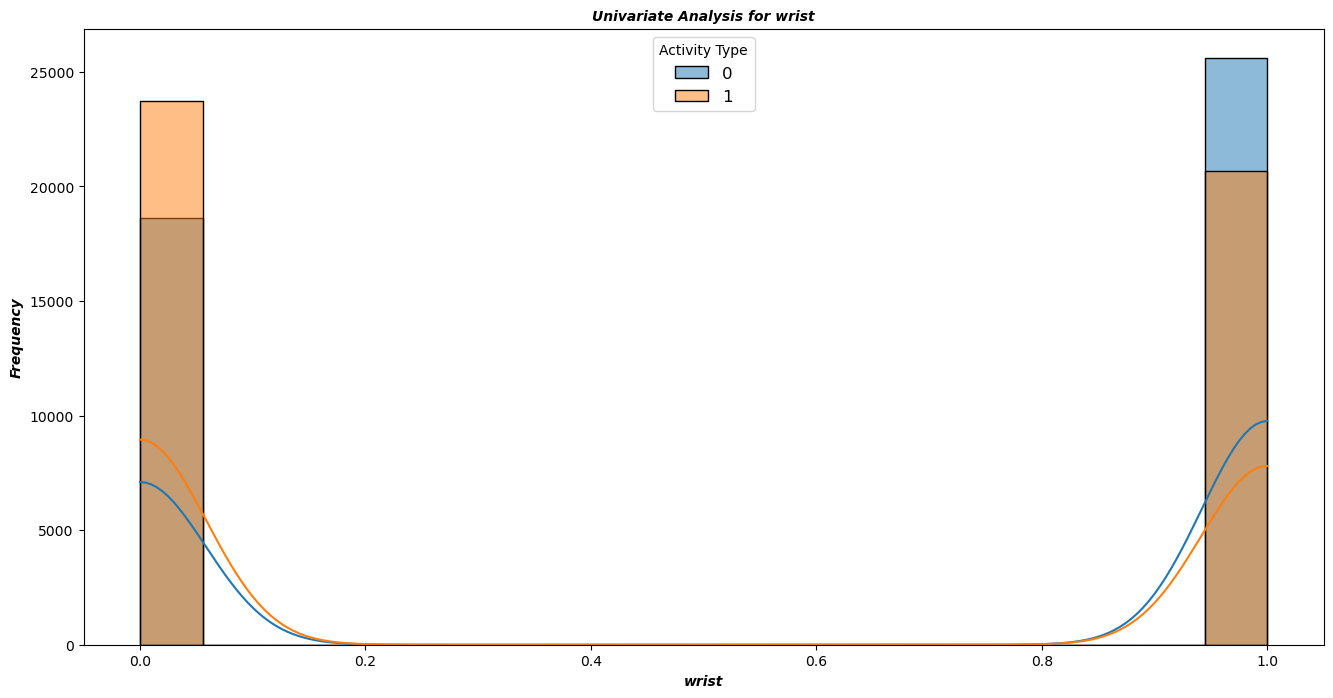

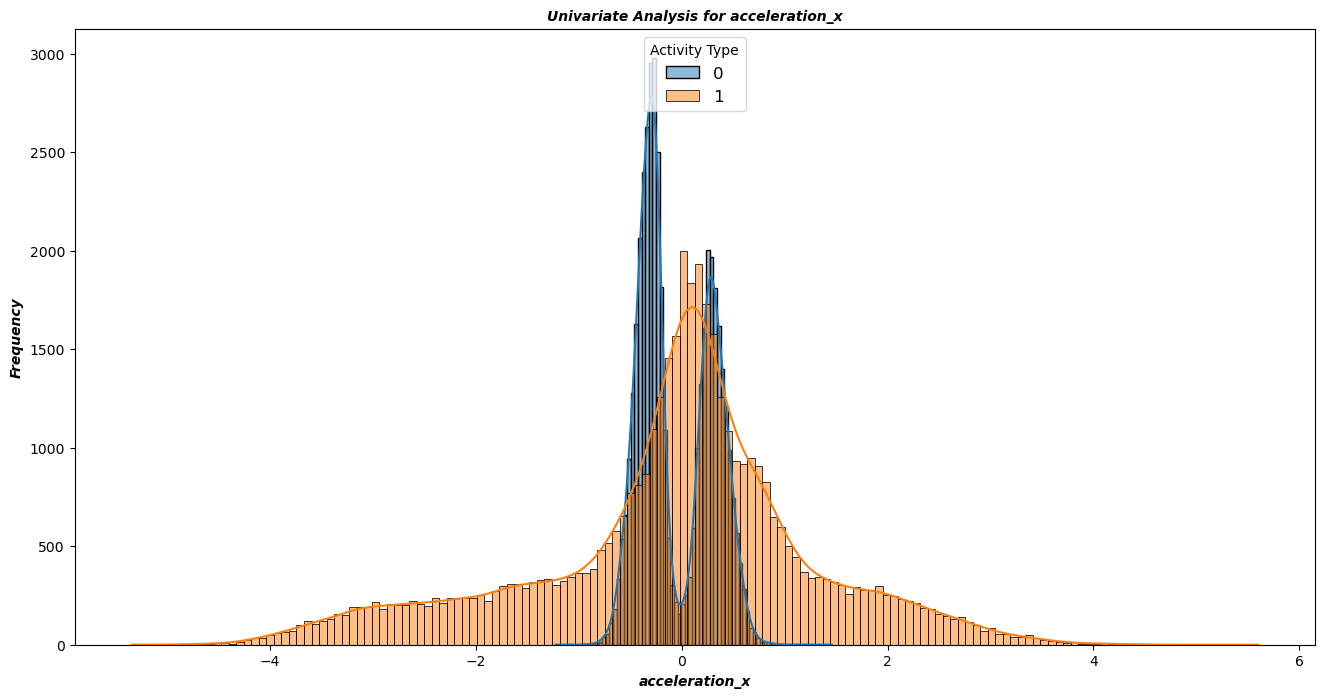

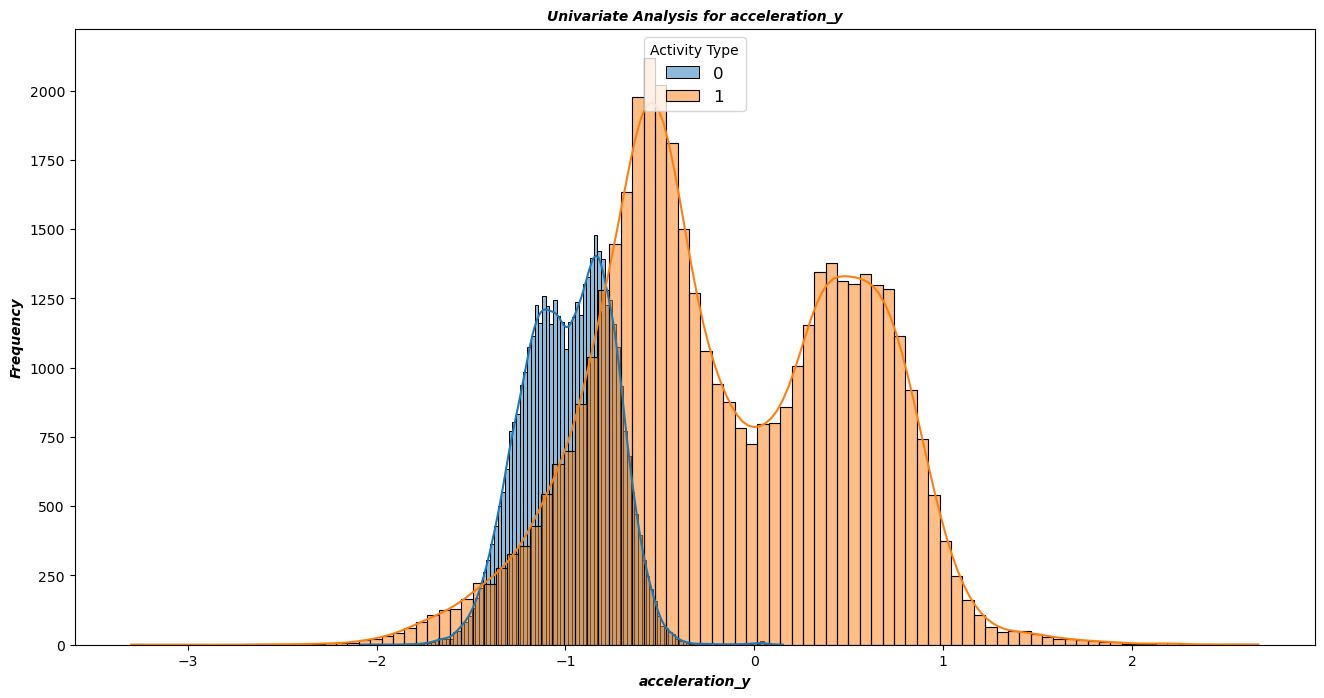

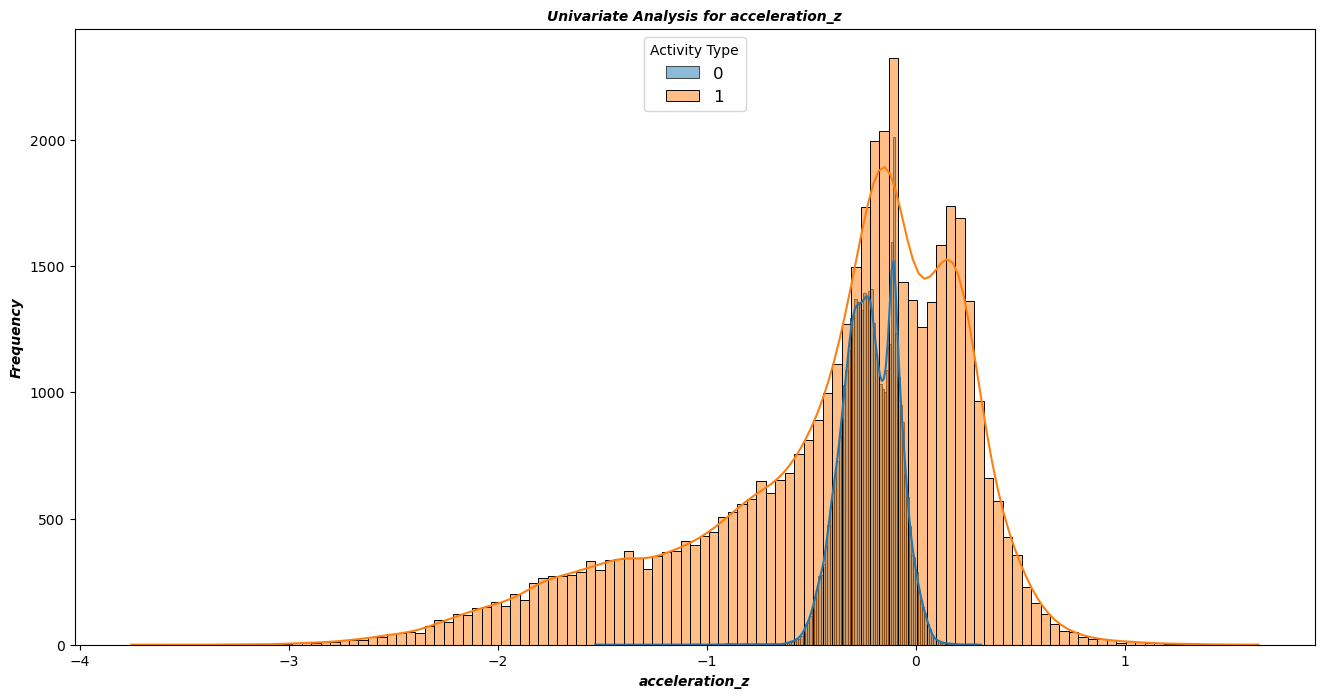

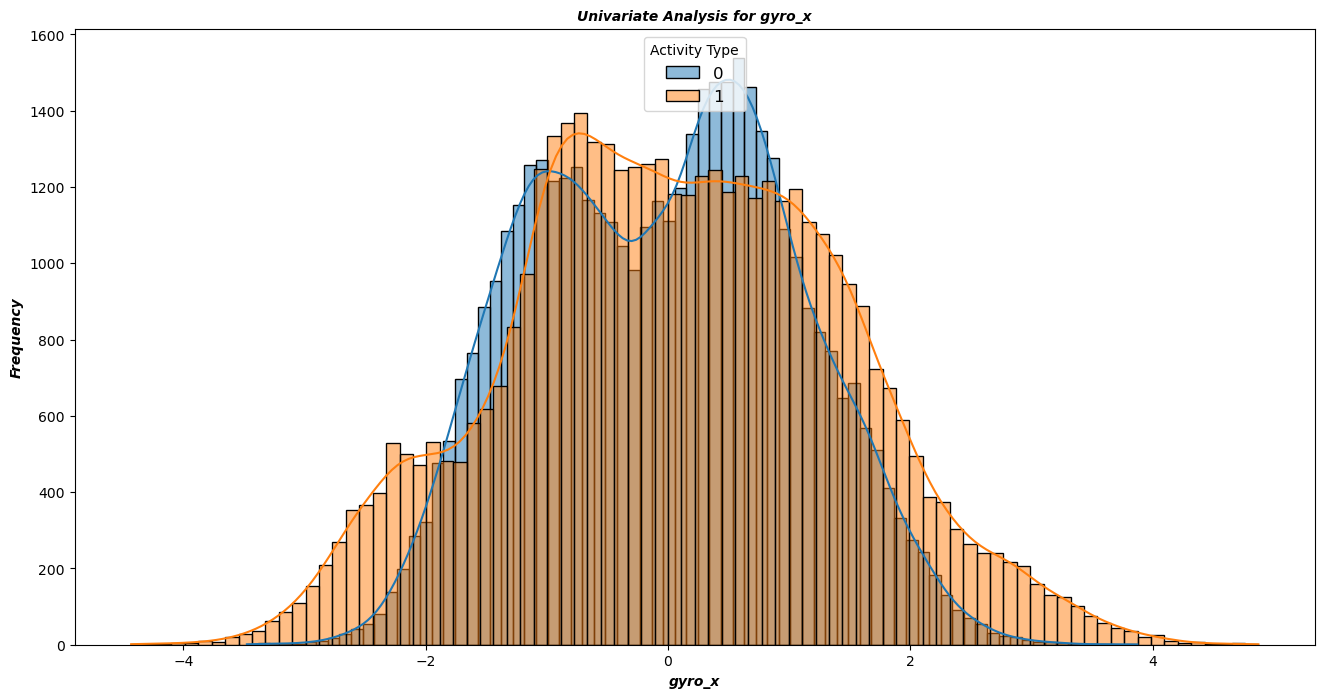

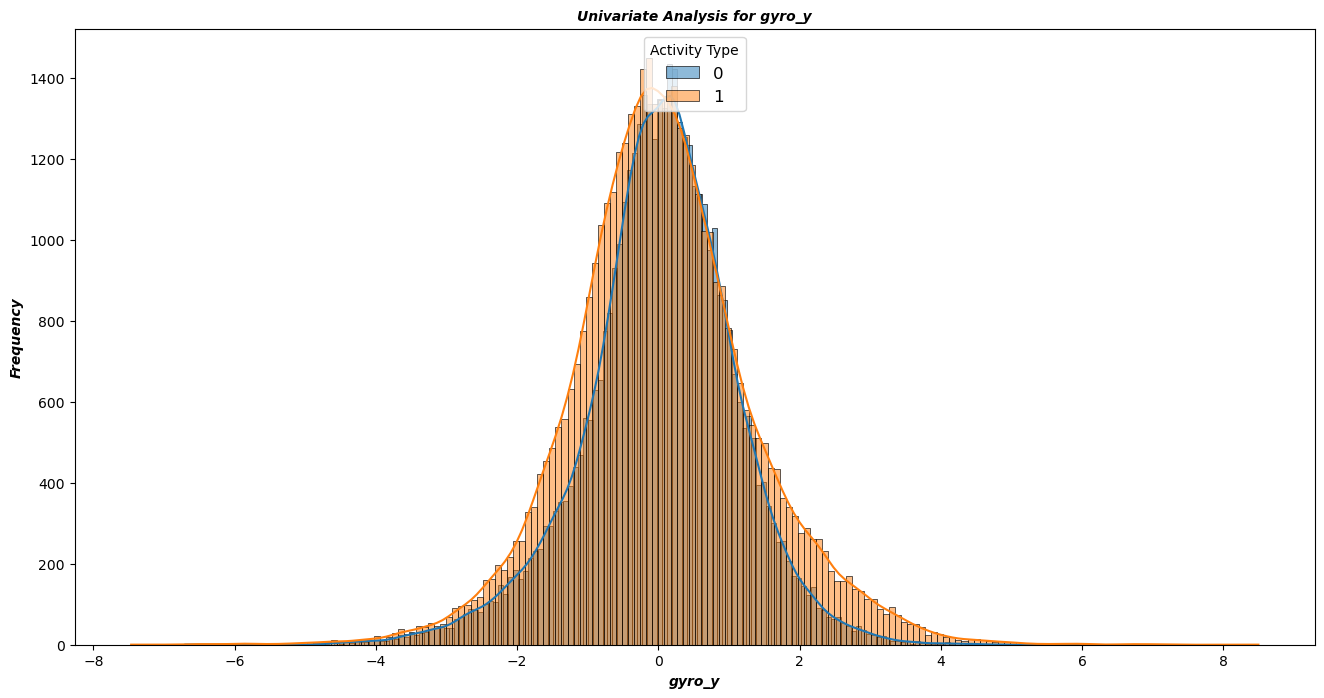

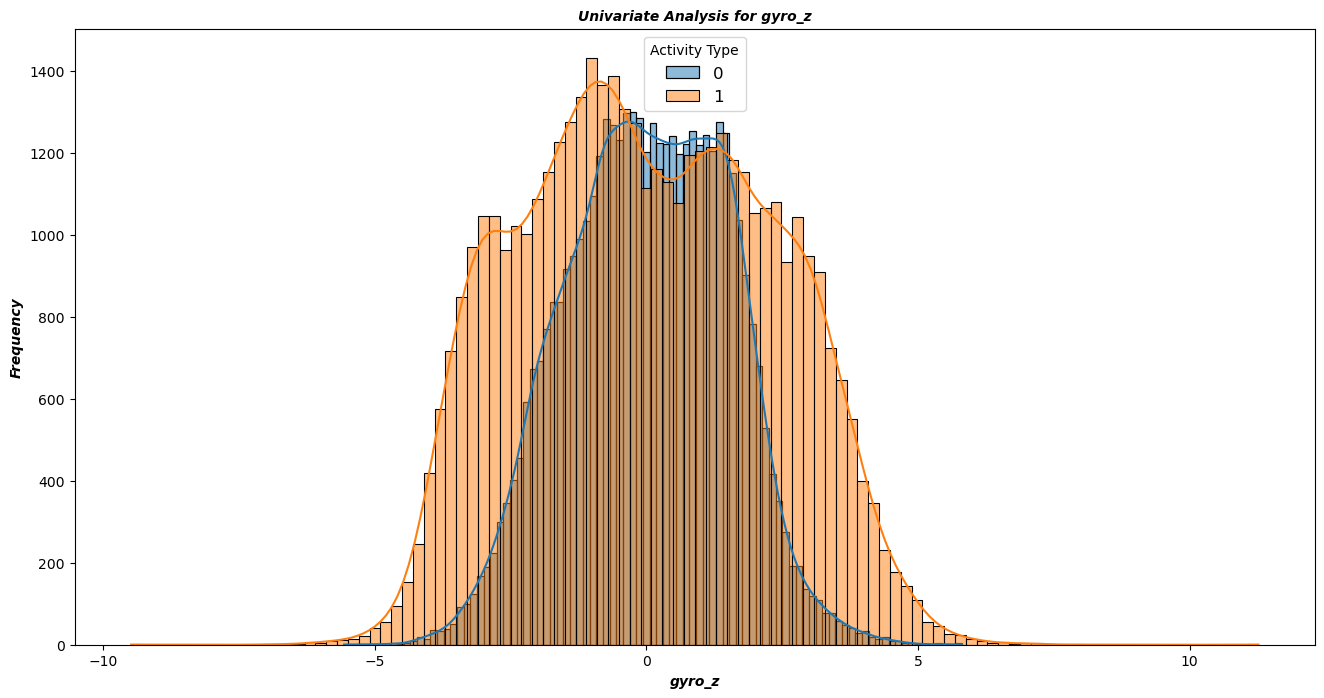

In [19]:
for feature in numerical_data:
    plt.figure(figsize=(16,8))
    for activity in data["activity"].unique():
        subset=data[data["activity"]==activity]
        sns.histplot(subset[feature], kde = True, label=activity, alpha=0.5)
    plt.title(f'Univariate Analysis for {feature}',fontsize=10, fontweight='bold',fontstyle='italic', color='black')
    plt.xlabel(feature, fontsize=10, fontweight='bold',fontstyle='italic')
    plt.ylabel('Frequency', fontsize=10, fontweight='bold',fontstyle='italic')
    plt.legend(title="Activity Type", fontsize=12, loc="upper center")
    plt.show()

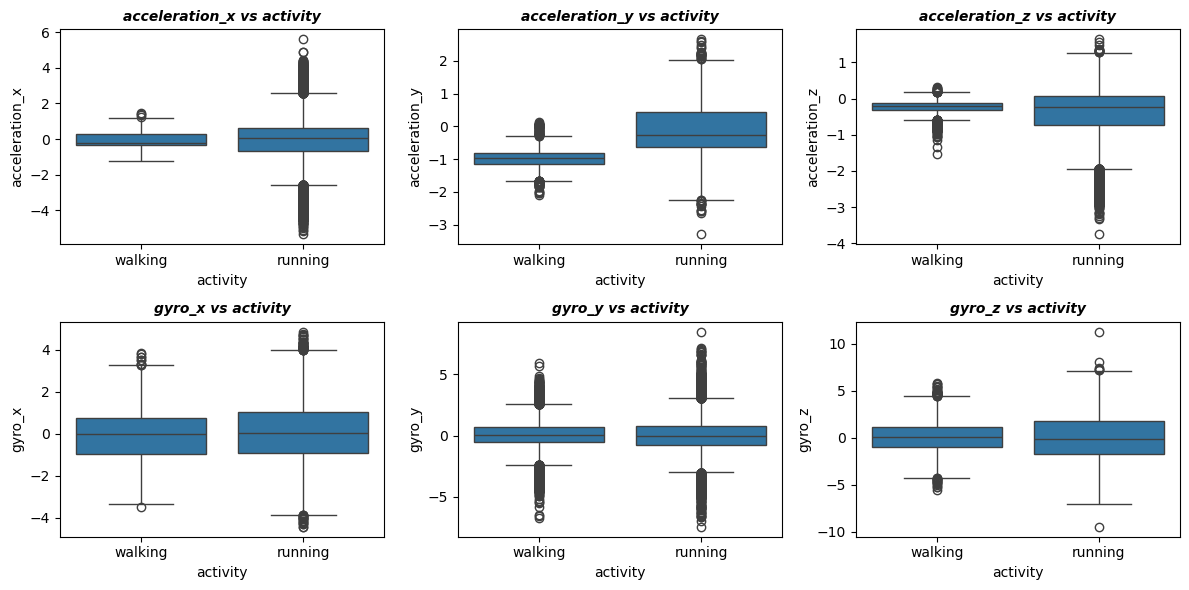

In [20]:
plt.figure(figsize=(12,6))
for i, feature in enumerate(numerical_feature_data,1):
    plt.subplot(2,3,i)
    sns.boxplot(data=data,x='activity',y=feature)
    plt.title(f"{feature} vs activity",fontsize=10, fontweight="bold", fontstyle="italic")
    plt.xlabel("activity")
    plt.ylabel(feature)
    plt.xticks([0,1],['walking','running'])
plt.tight_layout()
plt.show()    

#### *Insights from the bivariant Analysis*

* The points exciding the line the in the graph are called outliers, from the above analysis we come to know that all columns have outliers
* We have compared each activity with each feature available with us, the Horizontal line shows the median value of each activity when comparing with each feature
* The height of the box in the box plot represents the variability of the data present, it means it shows how spread out the data is. If it is height the data is more spread out and if is low the data are close together.

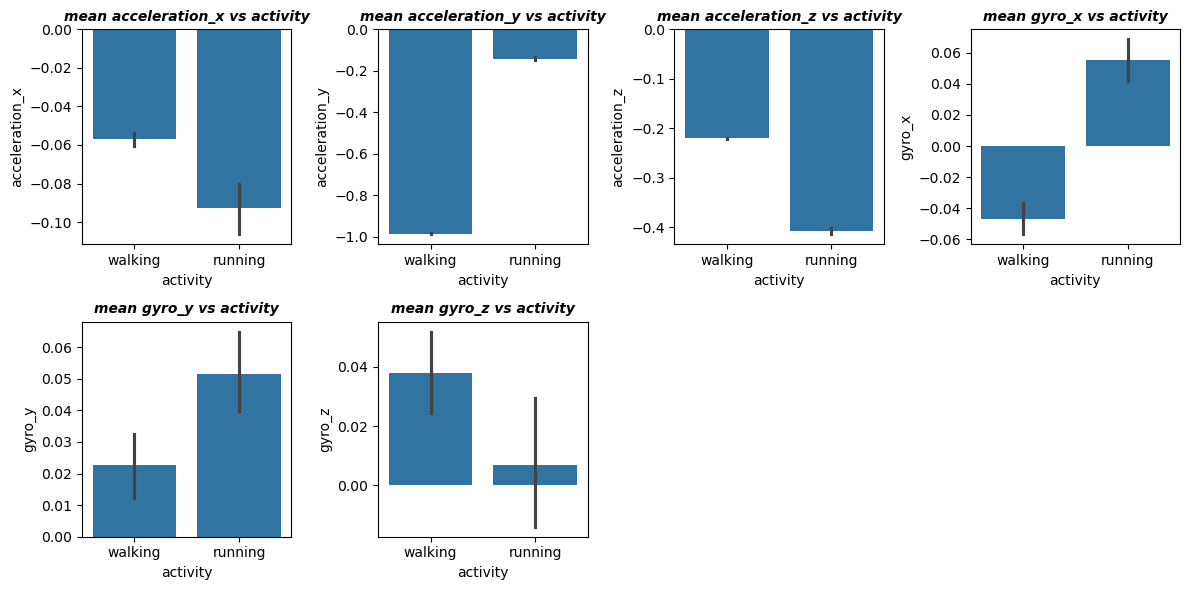

In [21]:
plt.figure(figsize=(12,6))
for i, feature in enumerate (numerical_feature_data,1):
    plt.subplot(2,4,i)
    sns.barplot(data=data,x="activity",y=feature, estimator=np.mean)
    plt.title(f"mean {feature} vs activity",fontsize=10,fontweight='bold',fontstyle='italic')
    plt.xticks([0,1],['walking','running'])
plt.tight_layout()
plt.show()

#### *Insights from mean bar chart*

* The height of the bar represents the average value of the feature comparing with the activity
* The line in the chart represents the error bar, if the error bar is less it means less variability and if it is height it shows high variability in data
* we have negative mean for most of the features other than gyro_y and gyro_z

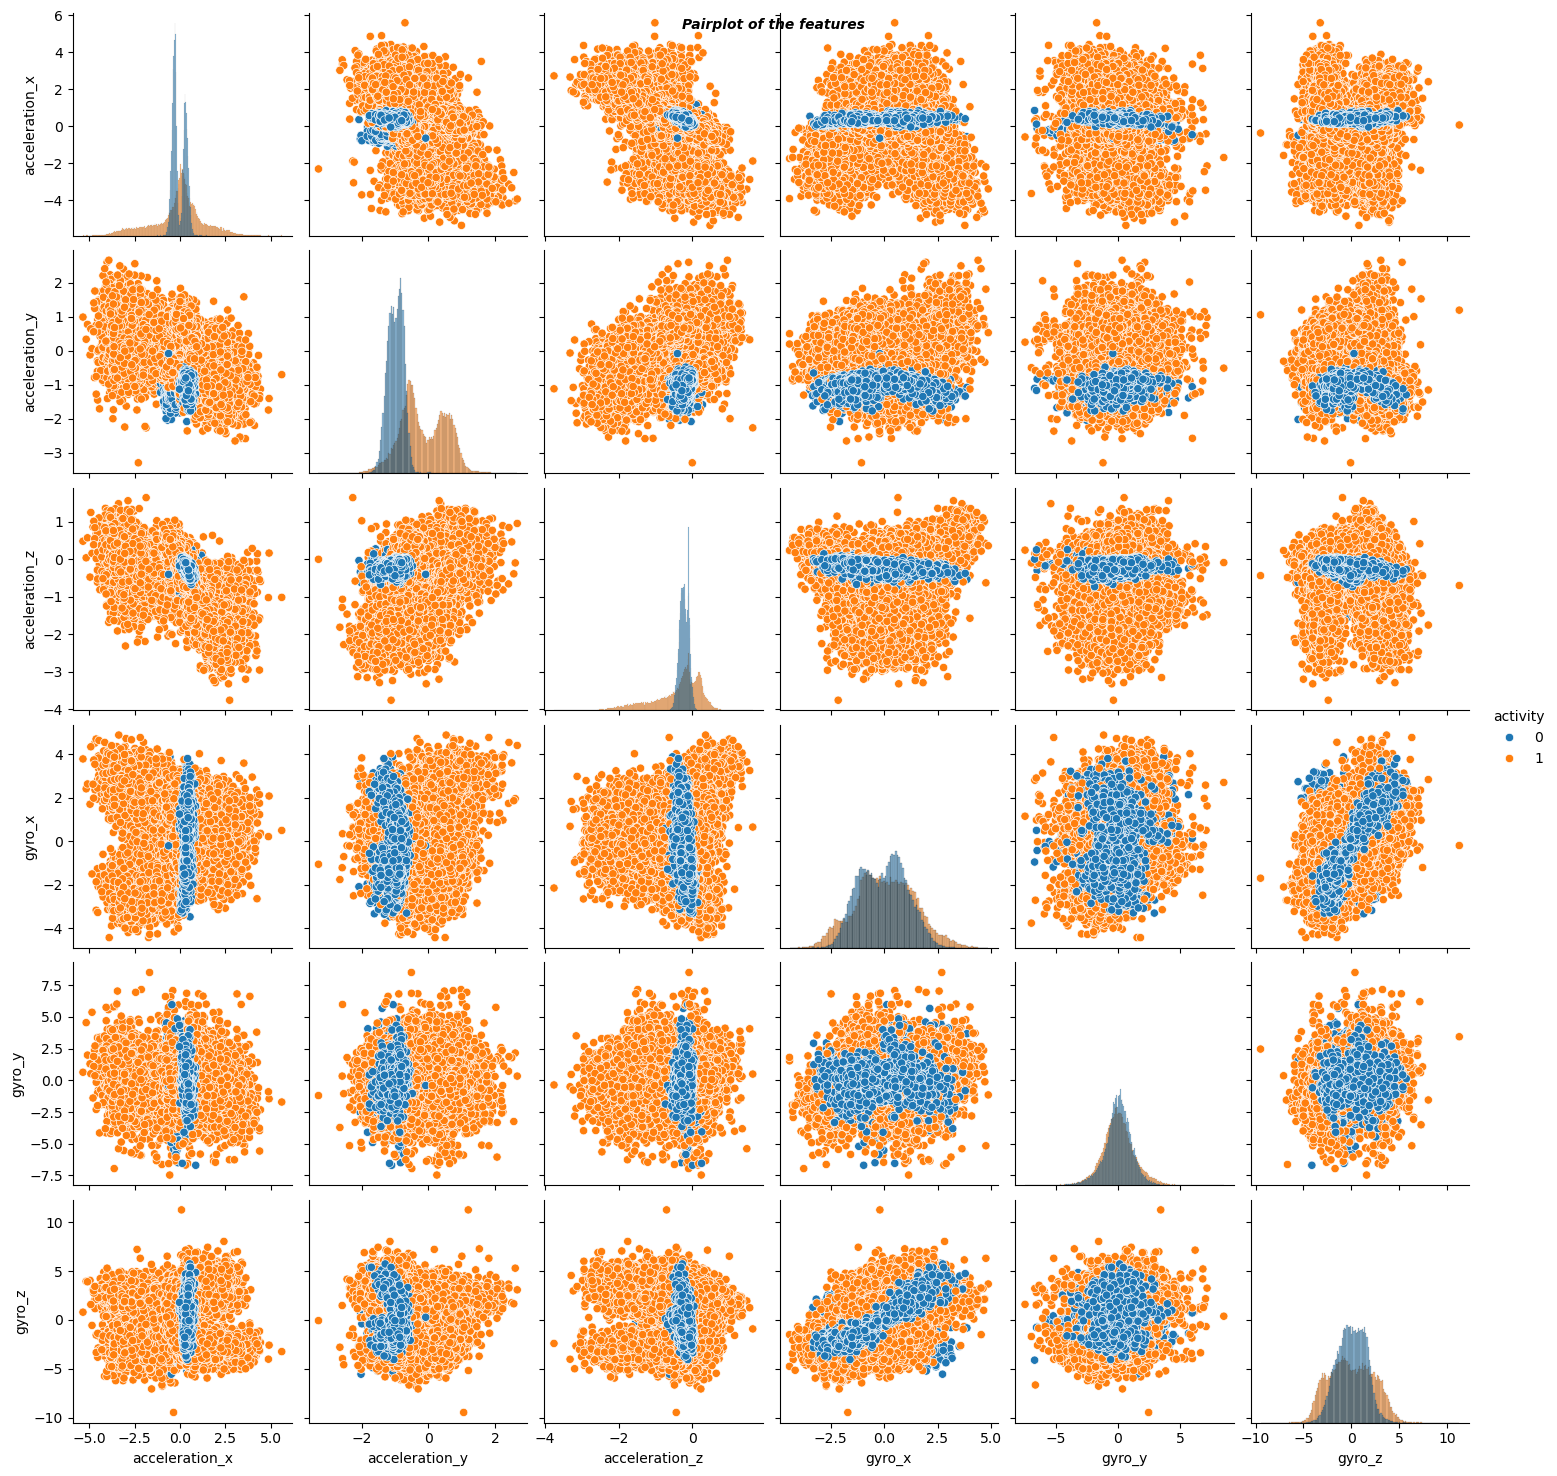

In [22]:
pairplot_features=["acceleration_x", "acceleration_y", "acceleration_z",	"gyro_x", "gyro_y",	"gyro_z","activity"]
sns.pairplot(data=data[pairplot_features],hue='activity', diag_kind='hist')
plt.suptitle("Pairplot of the features",fontsize=10,fontweight='bold',fontstyle='italic')
plt.show()

In [23]:
data_date_reformat=data["date"].str.split("-",expand=True) #spiliting the date into year, month, day
data_time_reformat=data["time"].str.split(":",expand=True) #spiliting the time in to hour, minute, second and millisecond 
data_date_time_reformat=pd.concat([data_date_reformat, data_time_reformat], axis=1) # merging both the dataframes using the concat function
data_date_time_reformat.columns=["year","month","day","hour","minute","second","ms"] #renaming the columns in the dataframes
data_date_time_reformat

,year,month,day,hour,minute,second,ms
0,2017,6,30,13,51,15,847724020
1,2017,6,30,13,51,16,246945023
2,2017,6,30,13,51,16,446233987
3,2017,6,30,13,51,16,646117985
4,2017,6,30,13,51,16,846738994
...,...,...,...,...,...,...,...
88583,2017,7,9,20,9,15,317911028
88584,2017,7,9,20,9,15,517889022
88585,2017,7,9,20,9,15,717828989
88586,2017,7,9,20,9,15,917932987


In [24]:
data_date_time_obj=pd.to_datetime(data_date_time_reformat) #creating a datetime object with the dataframe

In [25]:
data_sorted=data.copy()  #creating a duplicate data from the original data
data_sorted["datetime"]=data_date_time_obj 
data_sorted.set_index("datetime", inplace=True)    #replacing the index with the datetime column
data_sorted.drop(columns=["username"],axis=1,inplace=True)   #We dropped the username column as we don't need that

In [26]:
data_sorted

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,
2017-07-10 09:19:59.020,2017-6-30,13:51:15:847724020,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
2017-07-03 10:27:01.023,2017-6-30,13:51:16:246945023,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2017-07-05 17:48:29.987,2017-6-30,13:51:16:446233987,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
2017-07-08 01:19:53.985,2017-6-30,13:51:16:646117985,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
2017-07-10 09:03:34.994,2017-6-30,13:51:16:846738994,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...
2017-07-13 12:27:46.028,2017-7-9,20:9:15:317911028,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
2017-07-15 20:00:44.022,2017-7-9,20:9:15:517889022,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
2017-07-18 03:33:03.989,2017-7-9,20:9:15:717828989,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616


In [27]:
print("*** last row timestamp before sorting ***")
print(data_sorted.index[-1])

data_sorted.sort_index(inplace=True)   #sorting the index number to get the correct order of timestamp
print("*** last row timestamp after sorting ***")
print(data_sorted.index[-1])

*** last row timestamp before sorting ***
2017-07-11 04:46:06.004000
*** last row timestamp after sorting ***
2017-07-28 20:08:34.977000


In [28]:
data_sorted.head()

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,
2017-06-30 17:21:49.991,2017-6-30,13:52:0:12589991,0,0,0.3832,-1.0722,0.0366,-0.5351,1.5721,1.5499
2017-06-30 17:31:40.023,2017-6-30,13:52:4:13176023,0,0,0.3608,-1.0997,0.0289,-0.2530,0.3382,-0.5649
2017-06-30 17:31:52.024,2017-6-30,13:51:58:13194024,0,0,0.4383,-1.2338,-0.0071,0.2464,0.7006,1.8130
2017-06-30 17:31:59.024,2017-6-30,13:52:5:13194024,0,0,0.3158,-0.9102,0.0412,-0.1639,-0.2908,-1.4809
2017-06-30 17:32:08.025,2017-6-30,13:51:56:13212025,0,0,0.5521,-1.1966,-0.1881,0.4755,-0.4405,3.2137


In [29]:
data_sorted.tail()

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,
2017-07-28 19:57:09.974,2017-7-17,16:13:17:963832974,0,0,0.3557,-1.2748,-0.1373,-1.3811,-0.6323,-1.8182
2017-07-28 19:57:38.990,2017-7-17,16:9:2:964116990,0,0,0.3140,-0.9965,-0.1055,-1.5544,0.4047,-3.5570
2017-07-28 19:57:38.998,2017-7-17,16:11:43:963955998,0,0,0.4289,-1.0061,0.0162,0.6000,0.4153,2.1891
2017-07-28 20:01:04.005,2017-7-17,16:11:41:964163005,0,0,0.4099,-0.9718,-0.0293,-0.0332,1.1333,1.4500
2017-07-28 20:08:34.977,2017-7-17,16:13:15:964519977,0,0,0.3231,-0.7778,-0.0180,-1.3421,1.1859,-2.9589


In [30]:
print("Start date of data collected =",data_sorted.index.min())
print("End date of data collected =",data_sorted.index.max())
print("number of days the data collected =",data_sorted["date"].nunique())
print("Dates of data collection =",data_sorted["date"].unique())

Start date of data collected = 2017-06-30 17:21:49.991000
End date of data collected = 2017-07-28 20:08:34.977000
number of days the data collected = 12
Dates of data collection = ['2017-6-30' '2017-7-1' '2017-7-2' '2017-7-4' '2017-7-6' '2017-7-7'
 '2017-7-9' '2017-7-10' '2017-7-11' '2017-7-15' '2017-7-16' '2017-7-17']


#### *Insights from the datetime:*

* The data collected is for 12 days
* The start date is between 30th june of 2017 and the ending is on 17th july of 2017

## *Date-Time feature column analyse:*

In [31]:
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

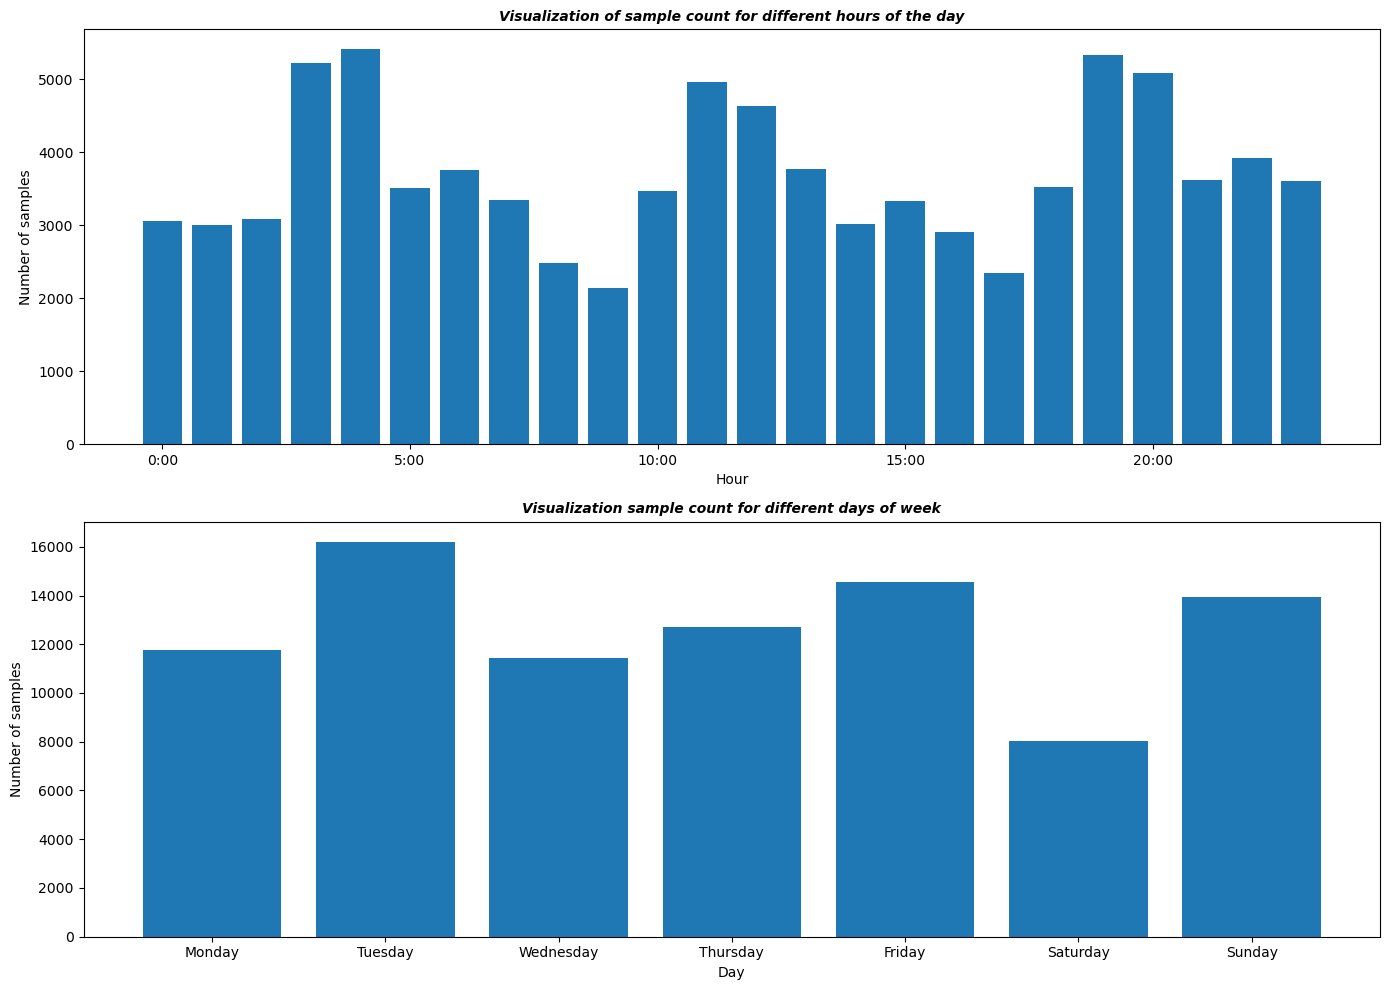

In [32]:
f, ax = plt.subplots(ncols=1, nrows=2, figsize=(14,10))

arr_hr = np.unique(data_sorted.index.hour, return_counts=True)
ax[0].bar(arr_hr[0], arr_hr[1])
ax[0].set_title("Visualization of sample count for different hours of the day",fontsize=10, fontweight="bold", fontstyle="italic")
ax[0].set_xlabel("Hour")
ax[0].set_ylabel("Number of samples")
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%d:00'))

arr_day = np.unique(data_sorted.index.dayofweek, return_counts=True)
ax[1].bar(arr_day[0], arr_day[1])
ax[1].set_title("Visualization sample count for different days of week",fontsize=10, fontweight="bold", fontstyle="italic")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Number of samples")
ax[1].set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

f.tight_layout()
f.show()
plt.show()

#### *Insights from Date-Time analysis*

* *Hours of the day* - We have more samples recorded during the below mentioned times and among them more samples recorded on early morning
* * 3:00 AM to 4:00 AM 
  * 11:00 AM to 12:00 PM
  * 7:00 PM to 8:00 PM
* *Days of the week* - We have more samples recorded on tuesday and the lowest is on saturday, we have more than 10000 samples collected on each day other than saturday's

## *Wrist and activity Analysis*

In [33]:
#creating a seperate index for the wrist and activity visualization:

data_sorted_wa=data_sorted.copy()
data_sorted_wa["wrist"].replace(to_replace={0:"left",1:"right"}, inplace=True) #replacing the values for better understanding
data_sorted_wa["activity"].replace(to_replace={0:"walk",1:"run"}, inplace=True) #replacing the values for better understanding

#printing the replaced values

print("Replaced unique values")
for each_cols in ["wrist","activity"]:
    print(each_cols,":", data_sorted_wa[each_cols].unique())

Replaced unique values
wrist : ['left' 'right']
activity : ['walk' 'run']


In [34]:
data_sorted_wa.head(3)

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,
2017-06-30 17:21:49.991,2017-6-30,13:52:0:12589991,left,walk,0.3832,-1.0722,0.0366,-0.5351,1.5721,1.5499
2017-06-30 17:31:40.023,2017-6-30,13:52:4:13176023,left,walk,0.3608,-1.0997,0.0289,-0.2530,0.3382,-0.5649
2017-06-30 17:31:52.024,2017-6-30,13:51:58:13194024,left,walk,0.4383,-1.2338,-0.0071,0.2464,0.7006,1.8130


#### *Visualizing the count of Wrist and Acitivity*

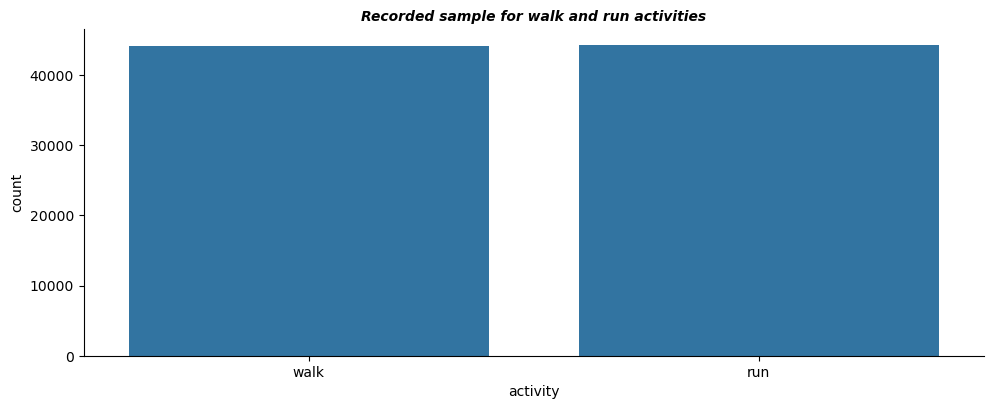

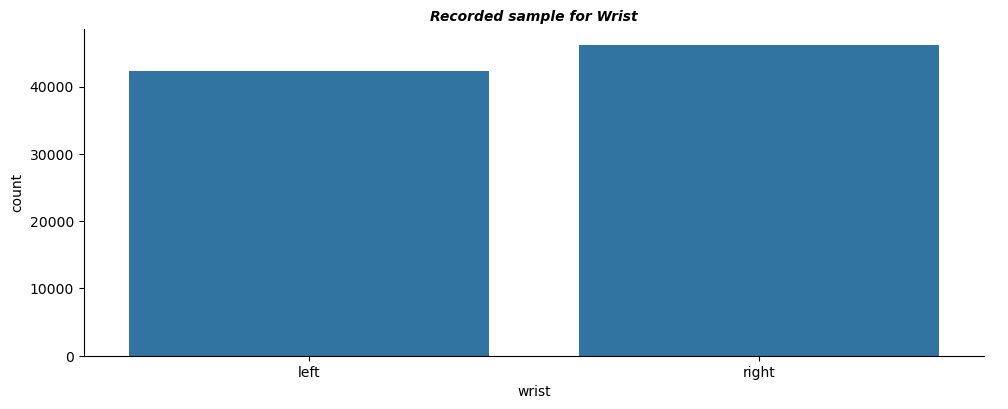

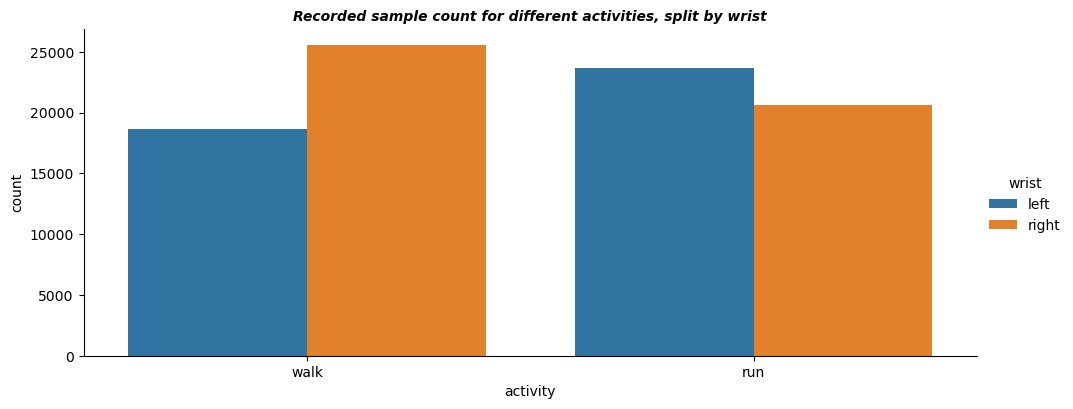

In [35]:
#Activity Visualization (First plot)

act=sns.catplot(data=data_sorted_wa, x="activity", kind="count", height=4, aspect=2.5)
act.ax.set_title("Recorded sample for walk and run activities", fontsize=10, fontweight="bold", fontstyle="italic")

#Wrist Visualization (Second plot)

wri=sns.catplot(data=data_sorted_wa, x="wrist", kind="count", height=4, aspect=2.5)
wri.ax.set_title("Recorded sample for Wrist",fontsize=10, fontweight="bold", fontstyle="italic")

#Activity visualization differenciated by wrist (Third plot)

act_wri=sns.catplot(data=data_sorted_wa, x="activity", kind="count", hue="wrist", height=4, aspect=2.5)
act_wri.ax.set_title("Recorded sample count for different activities, split by wrist", fontsize=10, fontweight="bold", fontstyle="italic")
plt.show()

#### *Insights from the Activity and Wrist Visualization:*

* *First plot* : The sample count is almost same for both the activities that is walk and run.
* *Second plot* : However the data is slightly skewed with the right hand wrist
* *Third plot* : We have more data recorded on the right wrist for walk and for left hand when the activity is running. 

## *Acceleration and Gyroscope data analysis*

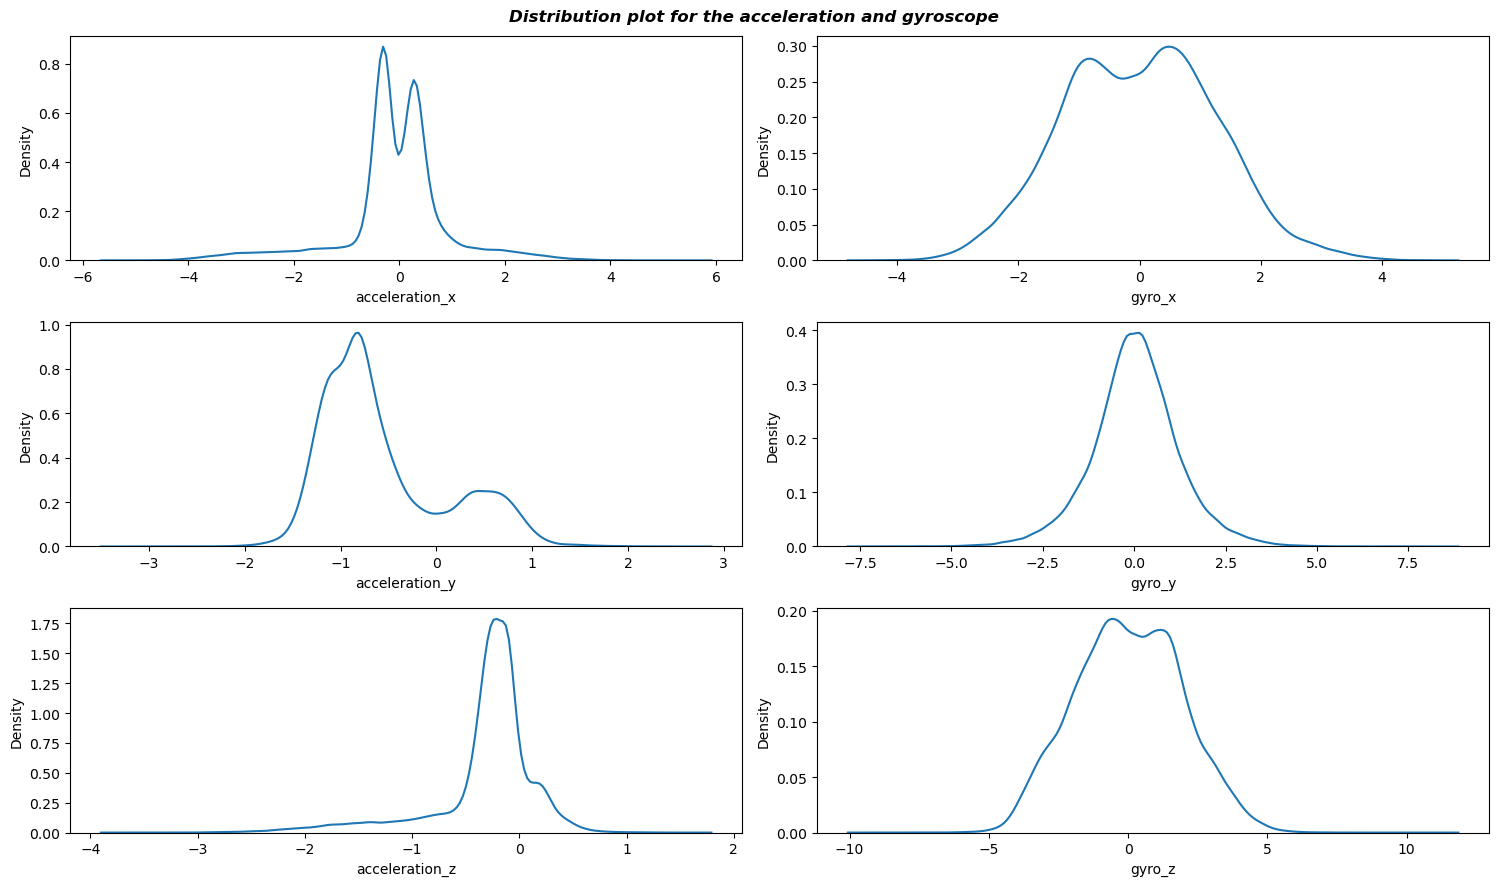

In [36]:
fig_kde, ax_kde = plt.subplots(figsize=(15,9),nrows=3,ncols=2) 
ax_num=0
for each_cols in data.columns.values[5:11]:
    g_kde=sns.kdeplot(data=data_sorted_wa[each_cols],ax=ax_kde[ax_num%3,ax_num//3])
    ax_num+=1
fig_kde.suptitle("Distribution plot for the acceleration and gyroscope", fontsize=12, fontstyle="italic",fontweight="bold")
fig_kde.tight_layout()
fig_kde.show()
plt.show()

#### *Insights from the distibution plot*

* *X-axis* : The x-axis data for accelerometer is somewhat symmetric and it also the same for gyroscope data.
* *y_axis* : The Y-axis data for accelerometer is more skewed towards left and the gyroscope data is a normal distribution.
* *z_axis* : The z-axis data for accelerometer is slightly skewed and the gyroscope data is symmetric.

#### *Visualization of acceleration and gyroscope data divided by activity*

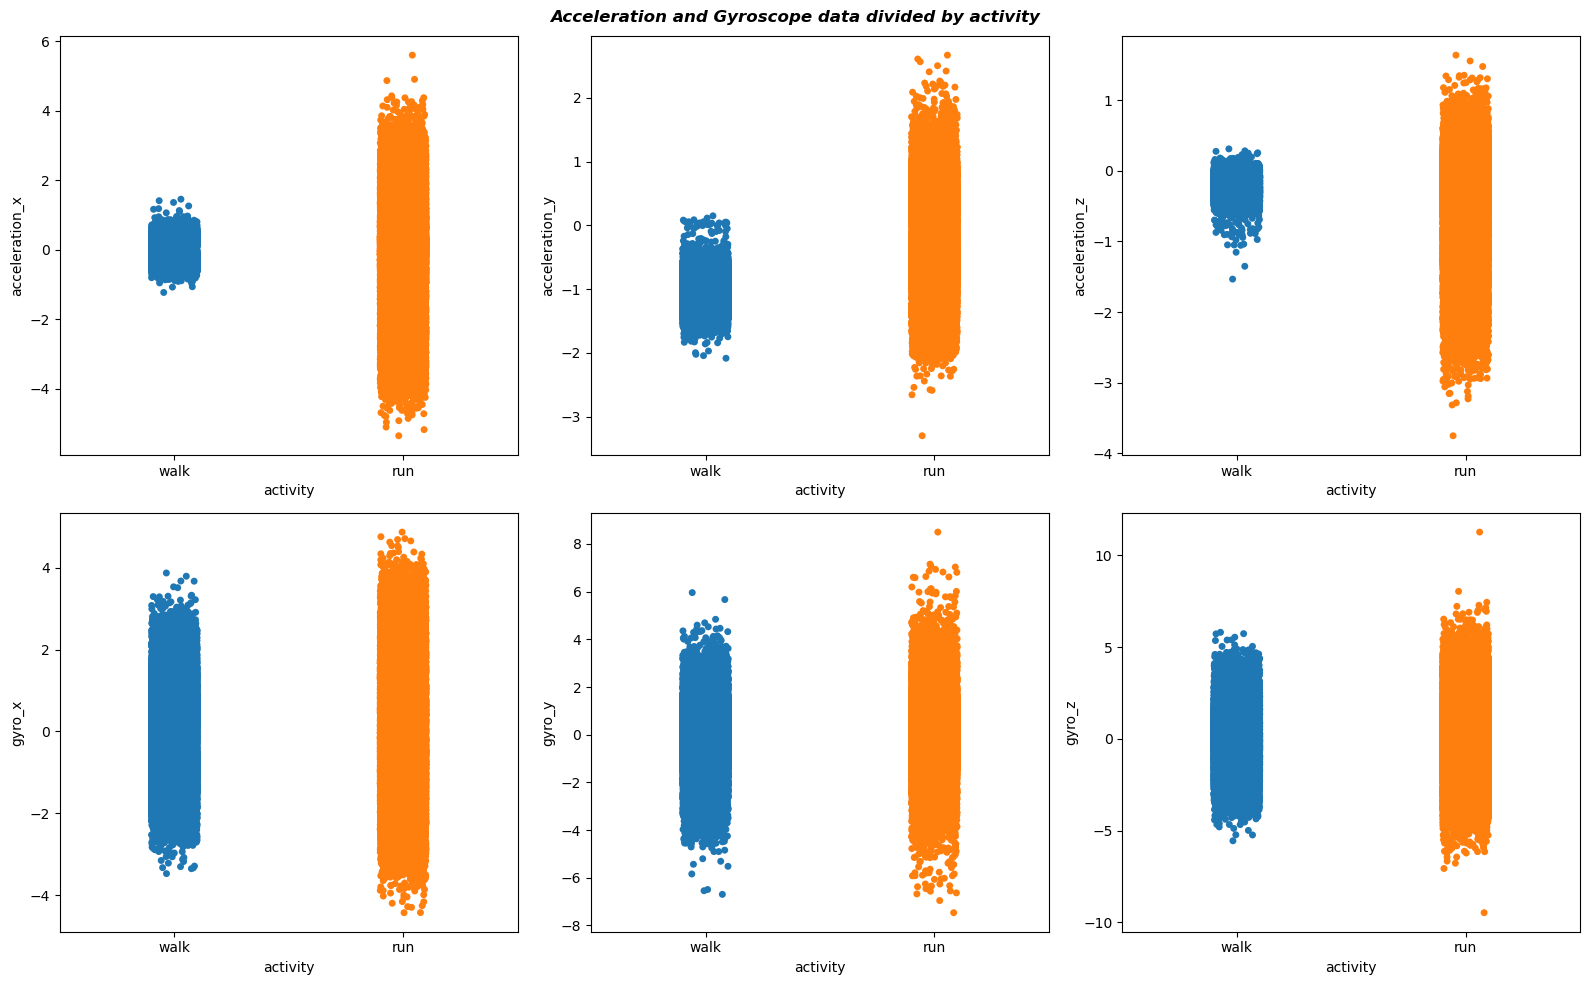

In [37]:
fig_strip, ax_strip = plt.subplots(figsize=(16,10), nrows=2, ncols=3)
ax_num=0
for each_cols in data.columns.values[5:11]:
    g_strip=sns.stripplot(data=data_sorted_wa, x="activity", y=each_cols, hue="activity", ax=ax_strip[ax_num//3, ax_num%3])
    ax_num+=1
    
fig_strip.suptitle("Acceleration and Gyroscope data divided by activity", fontstyle="italic", fontsize=12, fontweight="bold")
fig_strip.tight_layout()
fig_strip.show()
plt.show()

#### *Insights from the stripplot:*

* *Acceleration* : It shows clearly that acceleration have more samples collected for running than walking
* *Gyroscope* : Both the walk and run data samples are nearly same for gyroscope

## *Checking for Outliers*

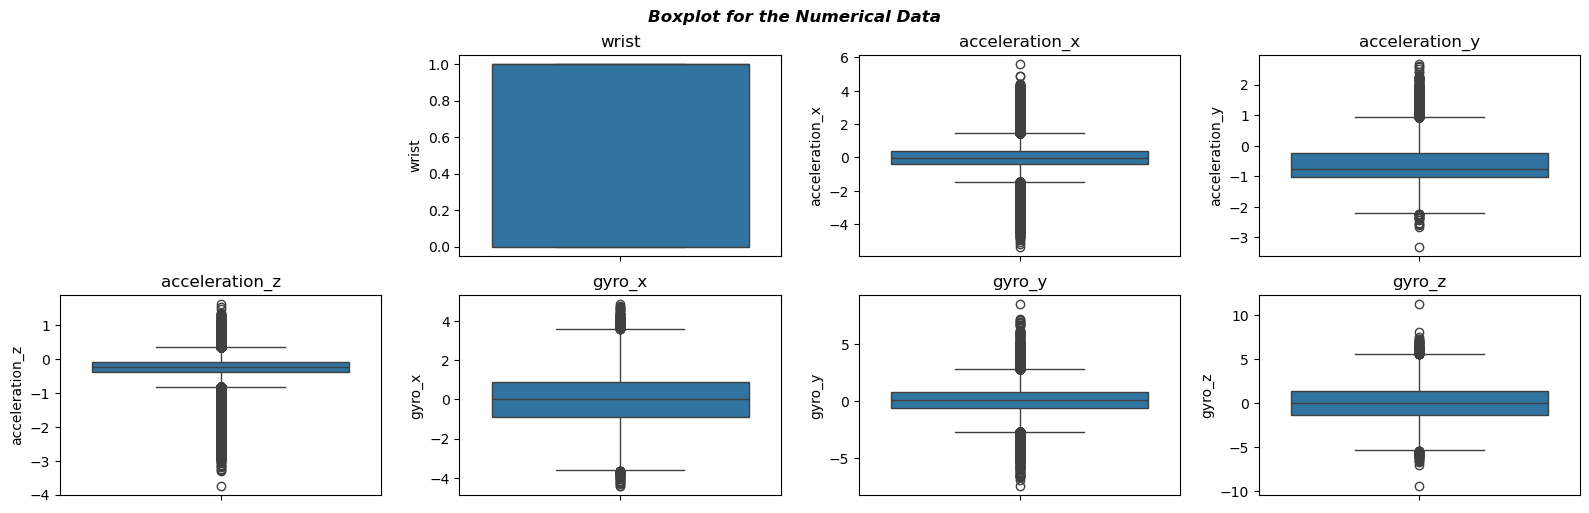

In [38]:
plt.figure(figsize=(16,10))
plt.suptitle("Boxplot for the Numerical Data", fontsize=12, fontweight="bold", fontstyle="italic")

for i, column in enumerate(numerical_data.columns,1):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()    
plt.show()

#### *Insight from the boxplot:*

We have outliers in almost all the sensor data, we can't handle outliers in the sensor data as it will negatively affect the performance of the model. so for the accuracy of the data, we are leaving the outliers untouched.

## *Checking Skewness*

In [39]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [40]:
from scipy import stats

In [41]:
skewness_results = {}

for column in numerical_data.columns:
    skewness = stats.skew(data[column])
    skewness_results[column]= skewness

for column, skewness in skewness_results.items():
    print(f"{column} skewness = {skewness}")

wrist skewness = -0.08876748572664855
acceleration_x skewness = -0.6209823757563957
acceleration_y skewness = 0.9077317572083938
acceleration_z skewness = -1.8377425547174362
gyro_x skewness = 0.06908117509241467
gyro_y skewness = -0.02393166496843546
gyro_z skewness = 0.04173176597309396


#### *Before transforming the skewness:*

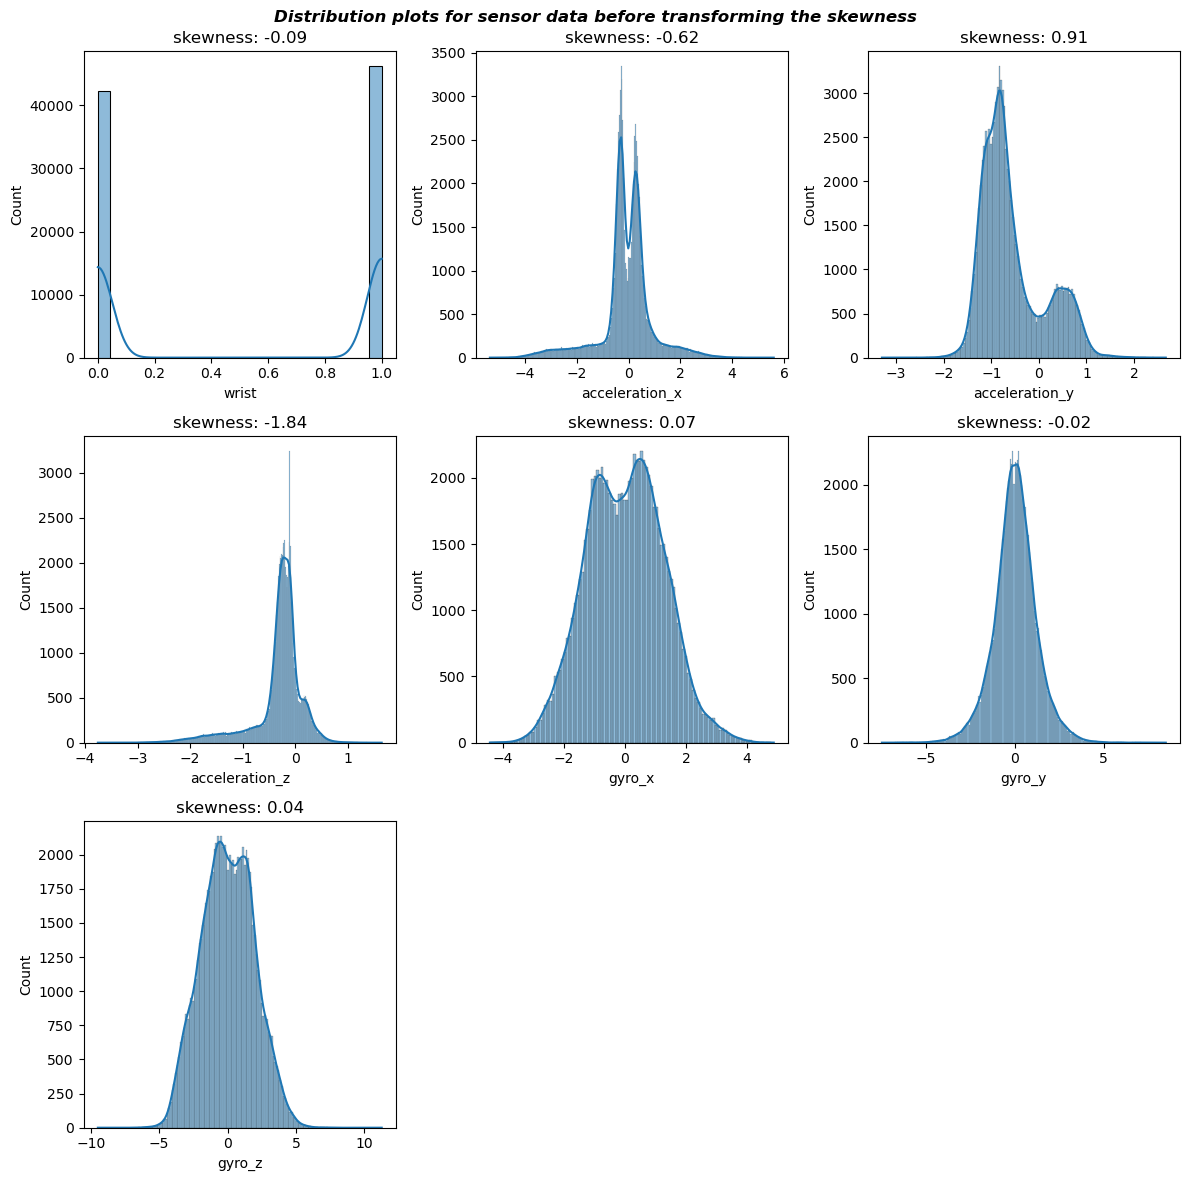

In [42]:
num_plots = len(numerical_data.columns)
num_rows = (num_plots + 2) // 3

plt.figure(figsize=(12, 4 * num_rows))
plt.suptitle("Distribution plots for sensor data before transforming the skewness",fontsize=12, fontweight="bold", fontstyle="italic")

for i, column in enumerate(numerical_data.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(numerical_data[column], kde= True)
    plt.title(f"skewness: {numerical_data[column].skew():.2f}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [43]:
skewness_before = {}

for feature in numerical_data:
    skewness_before[feature] = data[feature].skew()
    data[feature]=np.cbrt(data[feature])
skewness_after = {feature : data[feature].skew() for feature in numerical_data}

In [44]:
skewness_before

{'wrist': -0.08876898879827767,
 'acceleration_x': -0.6209928906536413,
 'acceleration_y': 0.9077471275417984,
 'acceleration_z': -1.8377736726281553,
 'gyro_x': 0.06908234482200133,
 'gyro_y': -0.023932070195713858,
 'gyro_z': 0.04173247260382652}

In [45]:
skewness_after

{'wrist': -0.08876898879827767,
 'acceleration_x': 0.022728647602085775,
 'acceleration_y': 1.3424702809117859,
 'acceleration_z': 1.1992822182260803,
 'gyro_x': -0.011230031052250154,
 'gyro_y': -0.05532176303530429,
 'gyro_z': -0.005036969161166024}

#### *After transforming the skewness*

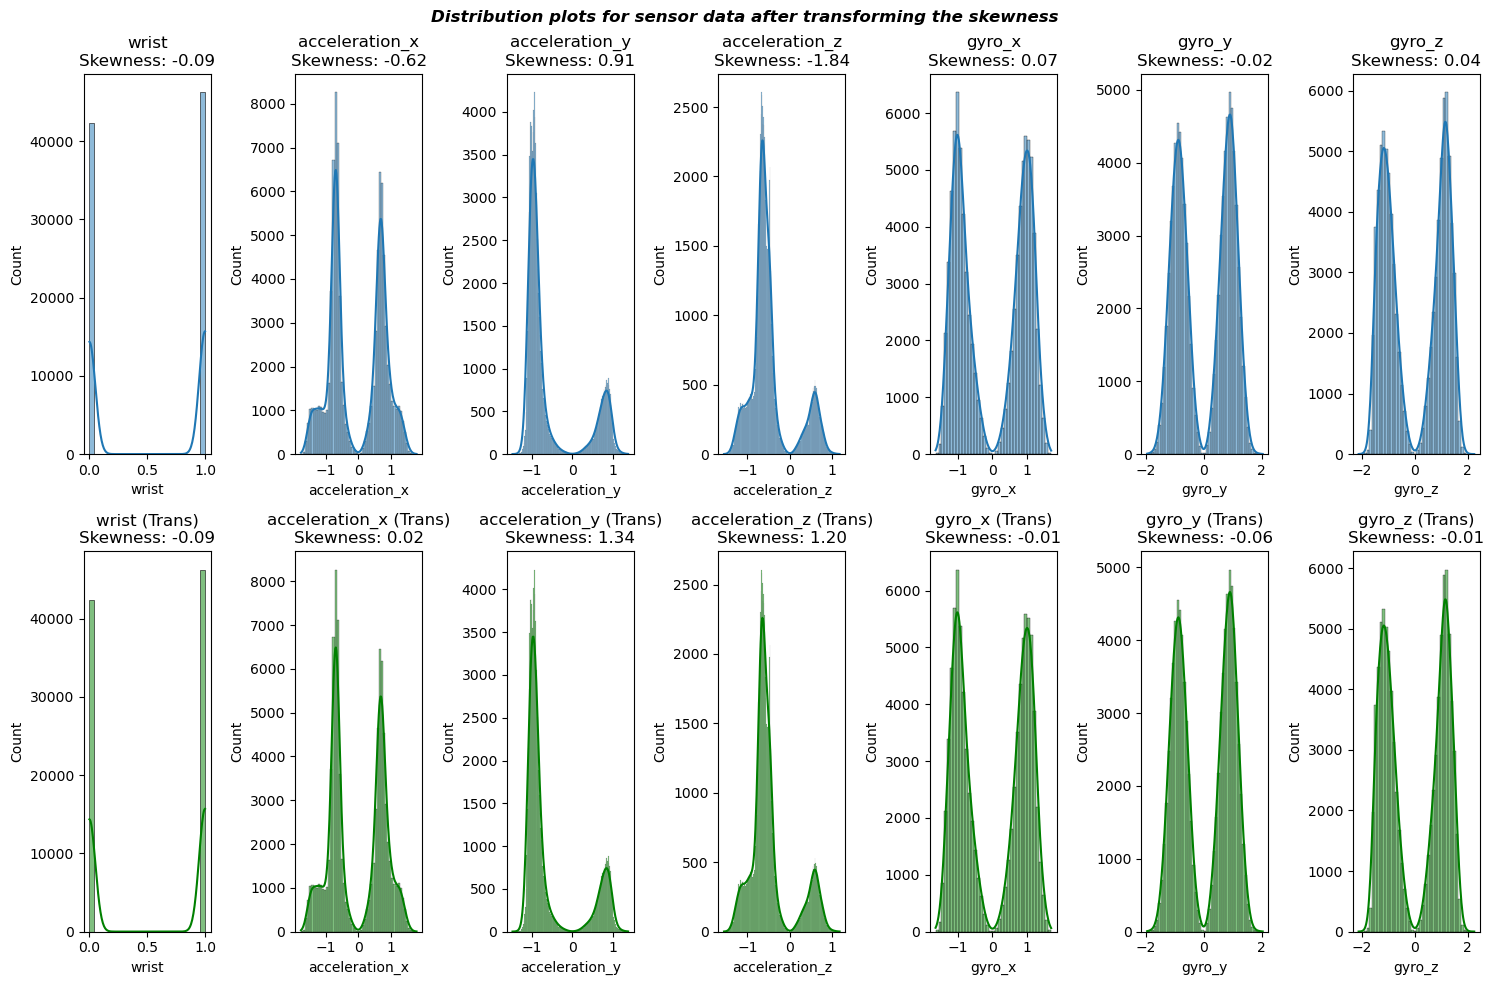

In [46]:
plt.figure(figsize=(15, 10))
plt.suptitle("Distribution plots for sensor data after transforming the skewness",fontsize=12, fontweight="bold", fontstyle="italic")
for i, feature in enumerate(numerical_data.columns):
    plt.subplot(2, len(numerical_data.columns), i + 1)
    sns.histplot(data[feature], kde=True)  # Create a distribution plot with KDE
    plt.title(f'{feature}\nSkewness: {skewness_before[feature]:.2f}')

    plt.subplot(2, len(numerical_data.columns), len(numerical_data.columns) + i + 1)
    sns.histplot(data[feature], kde=True, color='green')  # Create a distribution plot with KDE
    plt.title(f'{feature} (Trans)\nSkewness: {skewness_after[feature]:.2f}')

plt.tight_layout()
plt.show()

In [47]:
data = data.drop(['date', 'time', 'username'], axis=1)

In [48]:
data.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.0,0,0.642316,-0.921067,-0.196610,-0.389300,0.319125,-1.430879
1,0.0,0,0.875991,-1.039518,-0.616575,-0.560089,0.275014,0.502521
2,0.0,0,0.760533,-1.140040,0.416402,-0.969230,0.473708,-1.345656
3,0.0,0,0.671731,-0.933128,0.446140,0.493105,-0.742835,-1.431529
4,0.0,0,0.783734,-0.976520,0.329887,0.374919,0.759379,1.355796


## *Splitting the data*

In [49]:
#Splitting the dependent variables in to X

X = data.iloc[:,[0,2,3,4,5,6,7]]
X

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.0,0.642316,-0.921067,-0.196610,-0.389300,0.319125,-1.430879
1,0.0,0.875991,-1.039518,-0.616575,-0.560089,0.275014,0.502521
2,0.0,0.760533,-1.140040,0.416402,-0.969230,0.473708,-1.345656
3,0.0,0.671731,-0.933128,0.446140,0.493105,-0.742835,-1.431529
4,0.0,0.783734,-0.976520,0.329887,0.374919,0.759379,1.355796
...,...,...,...,...,...,...,...
88583,0.0,0.675624,-0.942639,-0.510063,0.784222,1.262520,0.845676
88584,0.0,0.792482,-1.000899,-0.760418,0.467538,-1.079081,-0.423768
88585,0.0,0.771216,-1.056124,-0.656309,-1.131851,-0.653590,-1.080539
88586,0.0,0.637431,-0.950305,-0.423396,-1.148896,0.769700,-1.210896


In [50]:
#Seperating the independent variable from the data

y = data.activity
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

#### *Scaling the data*

In [51]:
#Scaling the data using the standardscaler

from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X=s.fit_transform(X)

In [52]:
X

array([[-1.04536822,  0.83135504, -0.49557968, ..., -0.40301088,
         0.31056628, -1.27870498],
       [-1.04536822,  1.11486163, -0.66181083, ..., -0.5775245 ,
         0.26293233,  0.43974795],
       [-1.04536822,  0.97478213, -0.80288126, ..., -0.99558588,
         0.47749369, -1.20295698],
       ...,
       [-1.04536822,  0.98774393, -0.68511623, ..., -1.1617534 ,
        -0.73982453, -0.96731478],
       [-1.04536822,  0.82542864, -0.53661128, ..., -1.1791701 ,
         0.79712189, -1.08317917],
       [-1.04536822,  0.87669745, -0.5061896 , ...,  0.49638325,
         1.07557997,  0.95850351]])

#### *Checking Correlation*

In [53]:
#Using the corr function to get the correlation of the data

correlation = data.corr()  

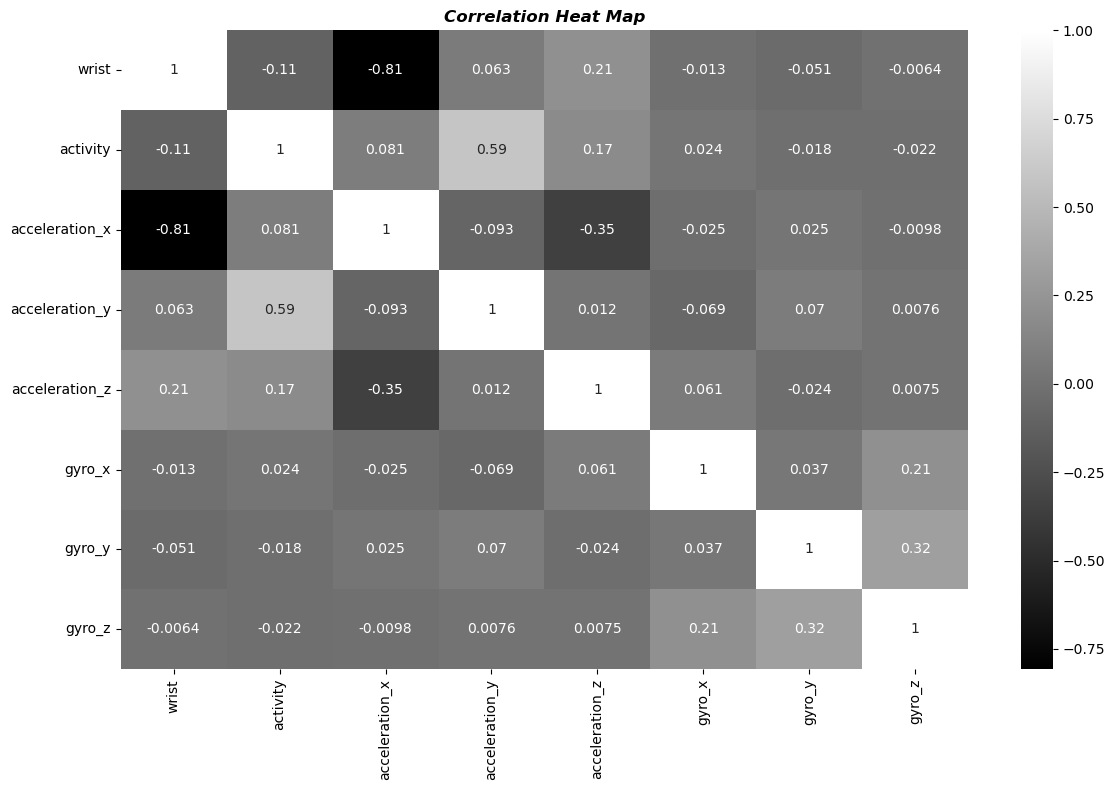

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation, annot= True, cmap = "grey")
plt.title("Correlation Heat Map", fontsize=12, fontweight="bold", fontstyle="italic")
plt.tight_layout()
plt.show()

#### *Insights from the above Heatmap*

* The acceleration X and Wrist are the highly correlated but if we drop, it will affect the prediction of our model

## *5) Model Creation*

In [55]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=10)

In [56]:
#Checking the shape of Train and test data

print("Shape of X_train=",X_train.shape)
print("Shape of X_test=",X_test.shape)
print("Shape of y_train=",y_train.shape)
print("Shape of y_test=",y_test.shape)

Shape of X_train= (66441, 7)
Shape of X_test= (22147, 7)
Shape of y_train= (66441,)
Shape of y_test= (22147,)


In [57]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

In [58]:
logistic_reg.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred = logistic_reg.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("*"*75)
print(f"confusion matrix:\n\n {confusion_matrix(y_test, y_pred)}")
print("\n")
print("*"*75)
print(f"Classfication Report:\n\n {classification_report(y_test, y_pred)}")
print("*"*75)
print("\n")
Logistic_reg_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score = {Logistic_reg_acc}")
print("\n")
print("*"*75)

***************************************************************************
confusion matrix:

 [[10021  1019]
 [ 2154  8953]]


***************************************************************************
Classfication Report:

               precision    recall  f1-score   support

           0       0.82      0.91      0.86     11040
           1       0.90      0.81      0.85     11107

    accuracy                           0.86     22147
   macro avg       0.86      0.86      0.86     22147
weighted avg       0.86      0.86      0.86     22147

***************************************************************************


Accuracy Score = 0.8567300311554612


***************************************************************************


## *The accuracy score for Logistic regression is **0.8622386779247754***

Confusion Matrix:
[[10021  1019]
 [ 2154  8953]]
***************************************************************************


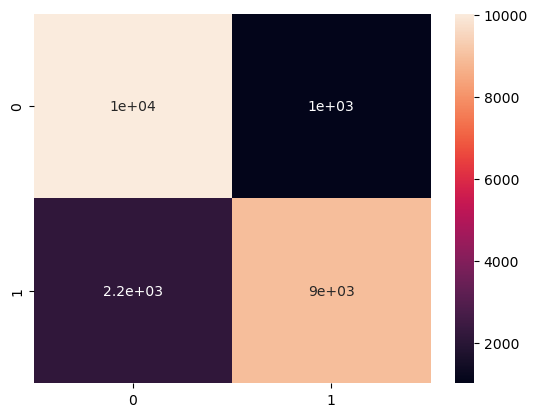

In [61]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print("*"*75)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

## *Decision Tree Classifier:*

In [62]:
from sklearn.tree import DecisionTreeClassifier
des_tree = DecisionTreeClassifier(random_state = 42)

In [63]:
des_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [64]:
y_pred = des_tree.predict(X_test)

In [65]:
des_tree_acc = accuracy_score(y_test, y_pred)
des_conf_matrix = confusion_matrix(y_test, y_pred)
des_class_rprt = classification_report(y_test, y_pred)

In [66]:
print("\n")
print("Accuracy score :", des_tree_acc)
print("\n")
print("*"*75)
print("\n")
print("Confusion Matrix :\n\n", des_conf_matrix)
print("\n")
print("*"*75)

print("\n")
print("Classfication Report :\n\n",des_class_rprt)
print("\n")
print("*"*75)
print("\n")



Accuracy score : 0.9837449767462861


***************************************************************************


Confusion Matrix :

 [[10859   181]
 [  179 10928]]


***************************************************************************


Classfication Report :

               precision    recall  f1-score   support

           0       0.98      0.98      0.98     11040
           1       0.98      0.98      0.98     11107

    accuracy                           0.98     22147
   macro avg       0.98      0.98      0.98     22147
weighted avg       0.98      0.98      0.98     22147



***************************************************************************




### *The accuracy score for Decision tree classifier is **0.983835282431029***

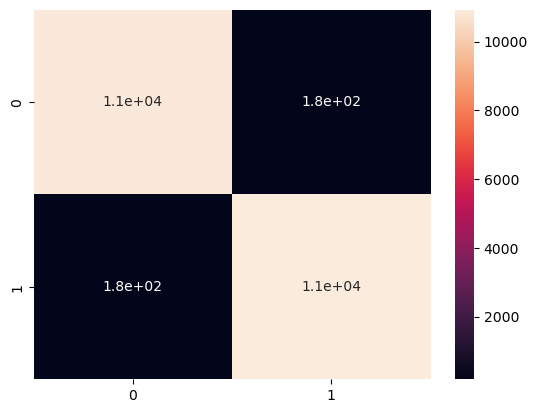

In [67]:
sns.heatmap(des_conf_matrix, annot=True)
plt.show()

## *Random Forest Classifier:*

In [2]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [69]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
y_pred = random_forest.predict(X_test)

In [71]:
Ran_for_acc = accuracy_score(y_test, y_pred)
Ran_conf_matrix = confusion_matrix(y_test, y_pred)
Ran_class_rprt = classification_report(y_test, y_pred)
    
#printing the values of the Random forest model

print("\n")
print("Accuracy score :", Ran_for_acc)
print("\n")
print("*"*75)
print("\n")
print("Confusion Matrix :\n\n", Ran_conf_matrix)
print("\n")
print("*"*75)
print("\n")
print("Classfication Report :\n\n",Ran_class_rprt)
print("\n")
print("*"*75)
print("\n")



Accuracy score : 0.9915564184765431


***************************************************************************


Confusion Matrix :

 [[10935   105]
 [   82 11025]]


***************************************************************************


Classfication Report :

               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



***************************************************************************




### *The accuracy score for Random Forest is **0.991646724161286***

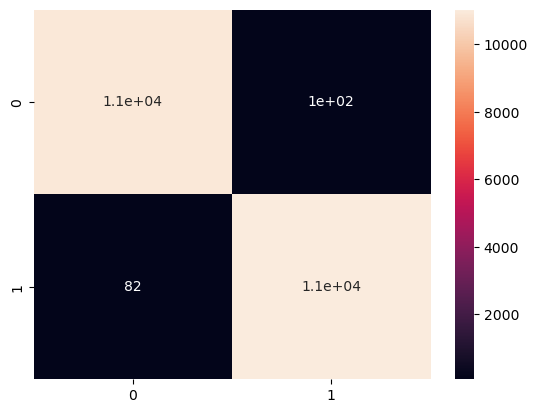

In [72]:
sns.heatmap(Ran_conf_matrix, annot=True)
plt.show()

## *Support Vector Classifier:*

In [73]:
from sklearn.svm import SVC
support_vector = SVC(kernel = "linear", C=1.0, random_state = 42)

In [74]:
support_vector.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [75]:
y_pred=support_vector.predict(X_test)

In [76]:
Support_for_acc = accuracy_score(y_test, y_pred)
Support_conf_matrix = confusion_matrix(y_test, y_pred)
Support_class_rprt = classification_report(y_test, y_pred)
    
#printing the values of the Random forest model

print("\n")
print("Accuracy score :", Support_for_acc)
print("\n")
print("*"*75)
print("\n")
print("Confusion Matrix :\n\n", Support_conf_matrix)
print("\n")
print("*"*75)
print("\n")
print("Classfication Report :\n\n",Support_class_rprt)
print("\n")
print("*"*75)
print("\n")



Accuracy score : 0.867702171851718


***************************************************************************


Confusion Matrix :

 [[10450   590]
 [ 2340  8767]]


***************************************************************************


Classfication Report :

               precision    recall  f1-score   support

           0       0.82      0.95      0.88     11040
           1       0.94      0.79      0.86     11107

    accuracy                           0.87     22147
   macro avg       0.88      0.87      0.87     22147
weighted avg       0.88      0.87      0.87     22147



***************************************************************************




### *The accuracy score for Support Vector Classifier is **0.991646724161286***

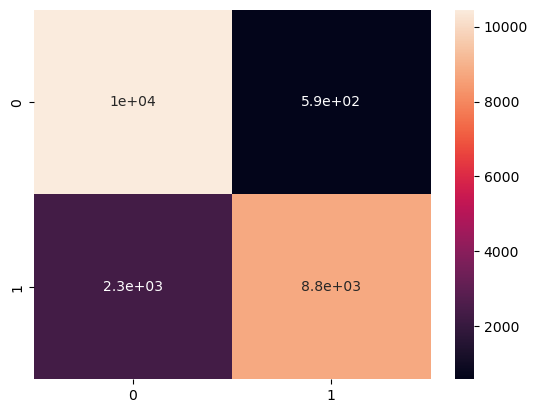

In [77]:
sns.heatmap(Support_conf_matrix, annot=True)
plt.show()

## *XG Boost Classifier*

In [78]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [79]:
import xgboost as xgb
num_classes = len(y.unique())
xg_boost = xgb.XGBClassifier(objective = "multi:softmax", num_class = num_classes, random_state=42)

In [80]:
xg_boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=2, ...)

In [81]:
y_pred = xg_boost.predict(X_test)

In [82]:
xgboost_acc = accuracy_score(y_test, y_pred)
xgboost_conf_matrix = confusion_matrix(y_test, y_pred)
xgboost_class_rprt = classification_report(y_test, y_pred)
    
#printing the values of the Random forest model

print("\n")
print("Accuracy score :", xgboost_acc)
print("\n")
print("*"*75)
print("\n")
print("Confusion Matrix :\n\n", xgboost_conf_matrix)
print("\n")
print("*"*75)
print("\n")
print("Classfication Report :\n\n",xgboost_class_rprt)
print("\n")
print("*"*75)
print("\n")



Accuracy score : 0.9924143224816002


***************************************************************************


Confusion Matrix :

 [[10954    86]
 [   82 11025]]


***************************************************************************


Classfication Report :

               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



***************************************************************************




### *The accuracy score for XGBoost Classifier is **0.9924143224816002***

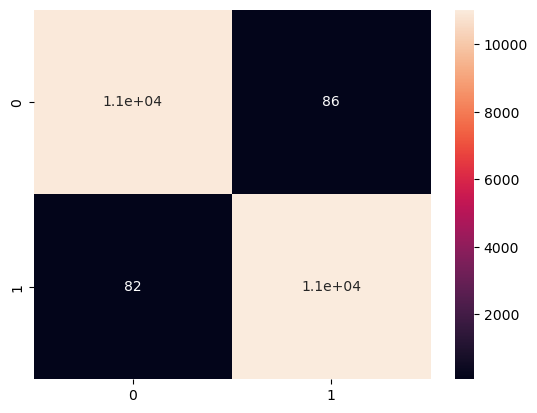

In [83]:
sns.heatmap(xgboost_conf_matrix, annot=True)
plt.show()

## *Hyperparameter tuning*

In [1]:
from sklearn.model_selection import RandomizedSearchCV
rf_classifier = RandomForestClassifier(random_state=42)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
#Defining the parameters

param_dist = {
    'n_estimators': np.arange(100, 1000, ),         # Number of trees in the forest
    'max_depth': [None] + list(np.arange(10, 110,)),  # Maximum depth of the trees
    'min_samples_split': np.arange(2, 11),            # Minimum samples required to split an internal node
    'min_samples_leaf': np.arange(1, 11)             # Minimum samples required to be at a leaf node
}

In [86]:
random_search = RandomizedSearchCV( estimator=rf_classifier, param_distributions=param_dist, 
    n_iter=10,  # Number of random combinations to try
    cv=3,         # Number of cross-validation folds
    scoring='accuracy', 
    random_state=42,
    n_jobs=-1     # Use all available CPU cores for parallelization
)

In [ ]:
random_search.fit(X_train, y_train) #Fitting the random search to the data

In [ ]:
# Get the best parameters and estimator from the Randomized Search
best_params_RF = random_search.best_params_
best_rf_classifier = random_search.best_estimator_

In [ ]:
print("Best Parameters:", best_params)

In [ ]:
test_accuracy_rf = best_rf_classifier.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

## *Conclusion*:

* **Logistic Regression(Log)**: This model achieved an accuracy score of 0.98. While it's a decent score, it may not be the best choice if higher accuracy is crucial for your task. You might want to consider more complex models if you need better performance.

* **Decision Tree (Decision)**: With an accuracy score of 0.98, the Decision Tree model performs very well on your dataset. It's a strong candidate for your task, and its simplicity makes it easy to interpret.

* **Random Forest (Random)**: The Random Forest model also scored 0.99 in accuracy, indicating excellent performance. Random Forest is an ensemble method based on Decision Trees and is known for its robustness and accuracy.

* **Support Vector Machine (SVM)**: SVM achieved an accuracy score of 0.87, which is reasonable but not as high as the scores of the Decision Tree and Random Forest. SVM can be effective in some cases, but it might not be the best choice for your specific dataset.

* **XGBoost (XGBoost)**: Similar to the Random Forest, XGBoost also scored 0.99 in accuracy. XGBoost is a powerful ensemble algorithm known for its high performance and is often a top choice in competitions and real-world applications.

## **XG BOOST CLASSIFIER** IS THE BEST SUITED MODEL FOR OUR WALK RUN CLASSIFICATION PROJECT